<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment04 
**20165396 박범진**


## 1. Plot the estimated parameters using the training dataset

* plot the estimated parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ at every iteration of gradient descent until convergence

* the colors for the parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$should be black, red, green, blue, respectively

* the optimization is performed using the training dataset ('data_train.csv')



In [0]:
# Read the files
import csv
import numpy as np

data_train = []
data_test = []
with open('data_train.csv', newline='') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for i in reader:
      data_train.append(list(map(np.float32, i)))

with open('data_test.csv', newline='') as myfile:
    reader = csv.reader(myfile, delimiter=',')
    for i in reader:
      data_test.append(list(map(np.float32, i)))


In [0]:
# Model Training

import random
random.seed(0)
theta = [random.random()]*4
lr = 0.000001

def func(t0,t1,t2,t3, x,y,z): # Function 
    return t0 + t1*x + t2*y + t3*z

def loss(data, t0,t1,t2,t3):
  J =  sum([(func(t0,t1,t2,t3, d[0],d[1],d[2]) - d[3])**2 for d in data])/len(data)/2
  return J

J = loss(data_train,theta[0], theta[1], theta[2], theta[3])
J_test = loss(data_test, theta[0], theta[1], theta[2], theta[3])
LOSS = [J]
LOSS_test = [J_test]
THETA =[[theta[0], theta[1],theta[2],theta[3]]]
        
# train data_train
while True:
  temp = J
  M = len(data_train)
  # Update Theta
  t0,t1,t2,t3 = theta
  theta[0] =theta[0] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3]) for d in data_train])/M
  theta[1] =theta[1] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[0] for d in data_train])/M
  theta[2] =theta[2] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[1] for d in data_train])/M
  theta[3] =theta[3] - lr* sum([(func(t0,t1,t2,t3, d[0],d[1], d[2]) - d[3])*d[2] for d in data_train])/M
  THETA.append([theta[0], theta[1],theta[2],theta[3]]) # Store Theta

  # Update and Store Loss
  J = loss(data_train, theta[0], theta[1], theta[2], theta[3])
  J_test = loss(data_test, theta[0], theta[1], theta[2], theta[3])
  LOSS.append(J)
  LOSS_test.append(J_test)
  if abs(t0-theta[0])  + abs(t1-theta[1]) + abs(t2-theta[2]) + abs(t3-theta[3])  <0.00001: # Convergence
    break

Text(0.5, 1.0, 'estimated parameters using the training dataest')

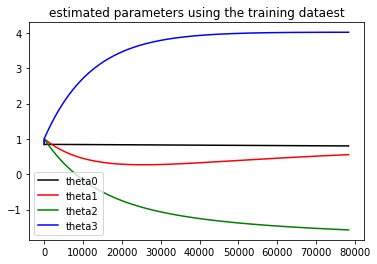

In [23]:
# Plot estimated parameters using the training dataset
import matplotlib.pyplot as plt

colors = ['black', 'red', 'green', 'blue'] 
for i in range(4): # 색깔별로 출력
  plt.plot([THETA[j][i] for j in range(len(THETA))], c=colors[i])
plt.legend(['theta0', 'theta1', 'theta2', 'theta3'])
plt.title('estimated parameters using the training dataest') 

## 2. Plotting the training error

훈련 시 저장해둔 Loss를 플롯한다. 

Text(0.5, 1.0, 'Error Using Training Data')

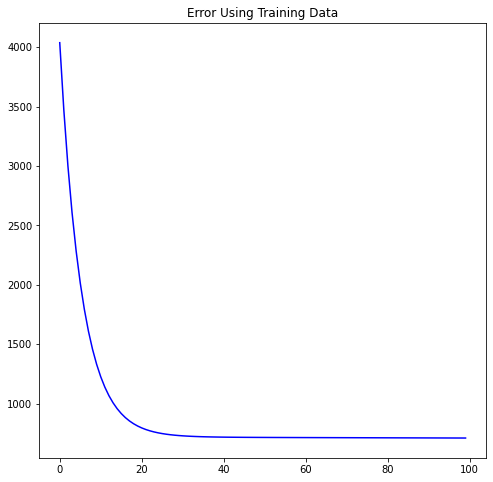

In [24]:
# LOSS 변수에 저장된 에러를 플롯

plt.figure(figsize=(8,8))
plt.plot(LOSS[:100], color='blue')
plt.title('Error Using Training Data')

## 3. Plotting the test error

Train 데이터를 훈련시키면서 해당 세타에 대하여 Test data에도 Loss값을 계산해서 저장해뒀다. 

이를 활용하여 Test error를 Plot 한다. 

Text(0.5, 1.0, 'Error Using Testing   Data')

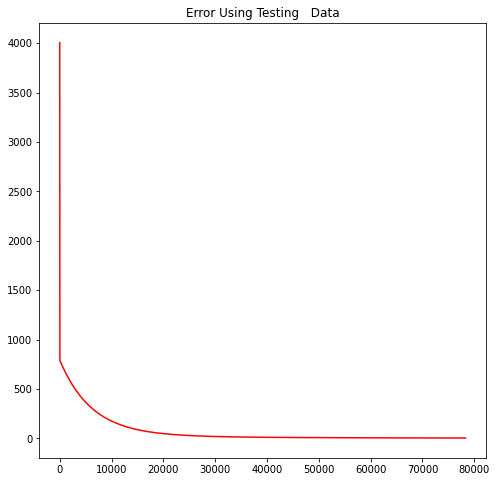

In [25]:
# LOSS_test 변수에 저장된 test 데이터 에러 플롯

plt.figure(figsize=(8,8))
plt.plot(LOSS_test, color='red')
plt.title('Error Using Testing   Data')

##4. Conclusion

초기에 세타값을 변하는 게 훈련데이터와 테스트 데이터 모두의 로스를 줄인 것을 볼 수 있다. 

다양한 초기값에 대하여 진행했을 경우 theta1,2,3은 일정한 값으로 수렴했으나, 
theta0는 초기값에서 크게 벗어나지 않았다. 

$ h_\theta  = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 z \approx \theta_0^{(0)} + 0.5x -y + 4z $ 